In [1]:
import numpy as np
from sklearn.cross_validation import train_test_split
import keras
import matplotlib.pyplot as plt 

np.random.seed(10)

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
size=7

dataset=np.loadtxt("cnn_xn+1_data100_x0.1_r4_s7.csv", delimiter=",")

data=dataset[:,0:size**2].copy()
label=dataset[:,size**2:size**2+1].copy()

dtrain,dtest,ltrain,ltest=train_test_split(data,label,train_size=0.7,random_state=1)
#print(dtrain)
dtrain=dtrain.reshape((dtrain.shape[0],size,size,1))
dtest=dtest.reshape((dtest.shape[0],size,size,1))
#print('oi',dtrain)


70/70 [==============================] - 0s 86us/step
0.19151267409324646 0.08065539641039712


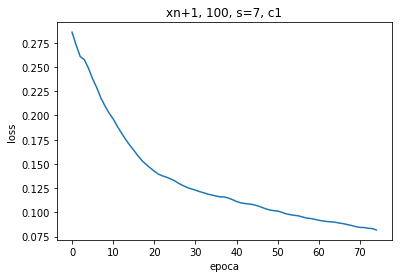

mae [0.35070255]


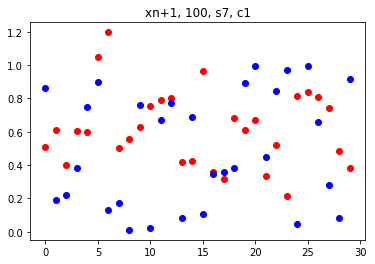

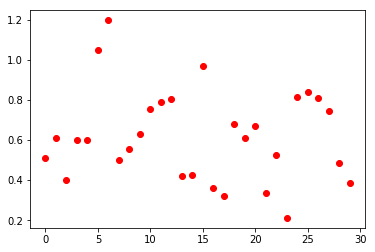

In [3]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#model.add(Conv2D(64, (5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c1')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s7, c1')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 71us/step
0.12004014104604721 0.12116593101194927


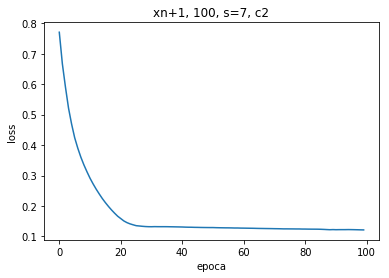

mae [0.31233935]


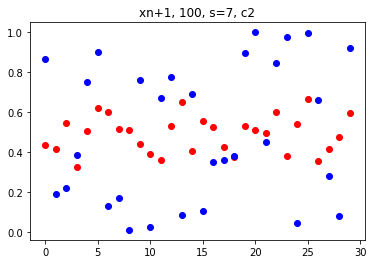

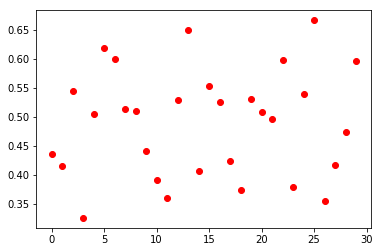

In [4]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=100,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c2')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c2')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 71us/step
0.14077667891979218 0.0978866237614836


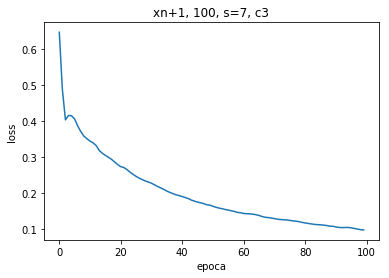

mae [0.31838832]


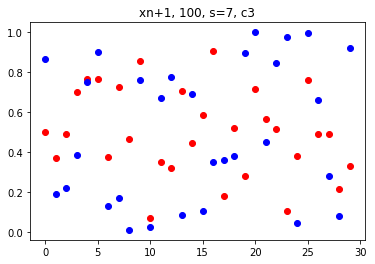

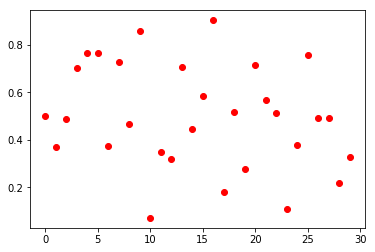

In [5]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=100,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c3')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c3')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 86us/step
0.16307976841926575 0.09504310935735702


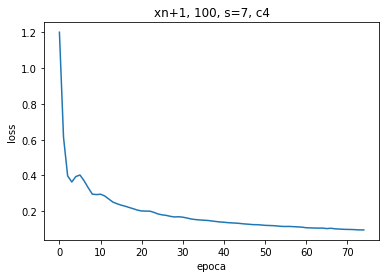

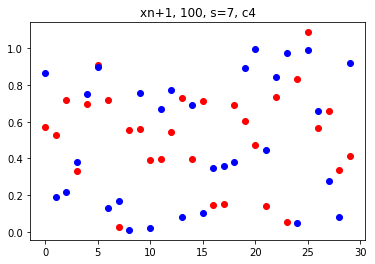

mae [0.33749799]


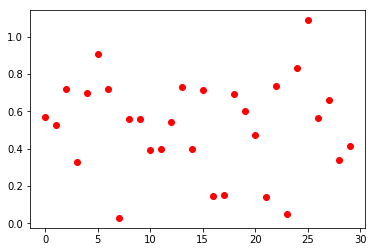

In [6]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(15, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')

history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c4')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)
  
plt.title('xn+1, 100, s=7, c4')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 71us/step
0.20674730837345123 0.0656118324824742


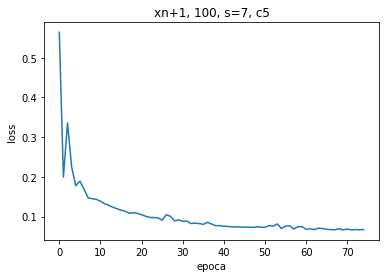

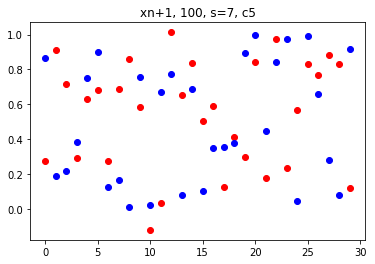

mae [0.37945826]


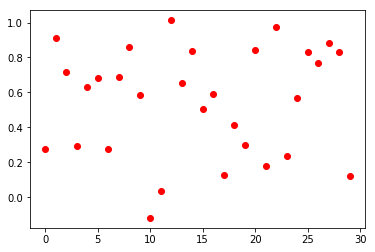

In [7]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(90, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')

history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c5')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)
  
plt.title('xn+1, 100, s=7, c5')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 71us/step
0.16609570384025574 0.001651789534038731


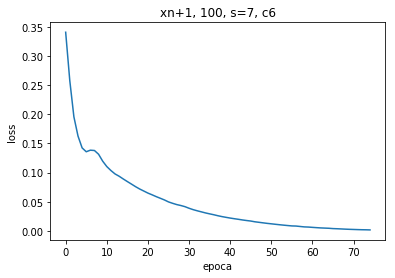

mae [0.34357001]


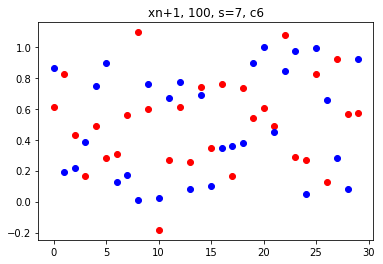

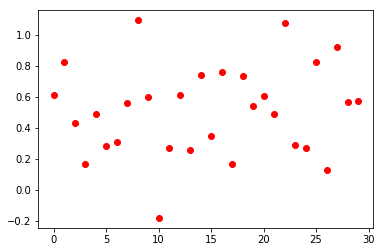

In [8]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(90, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c6')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c6')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 100us/step
0.18244248628616333 0.06625756280762808


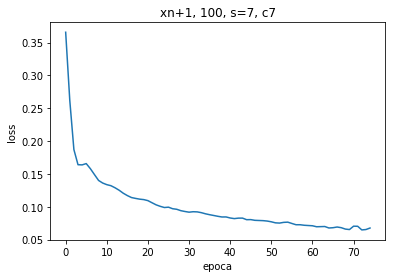

mae [0.35274699]


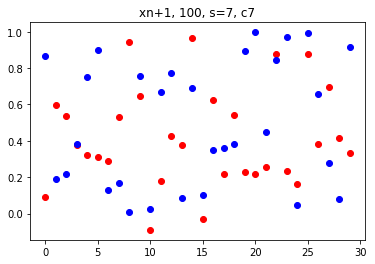

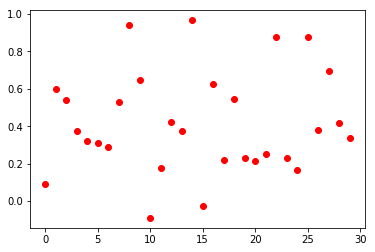

In [9]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Conv2D(2, (2, 2), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(70, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c7')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c7')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 86us/step
0.1600313037633896 0.08141201000128473


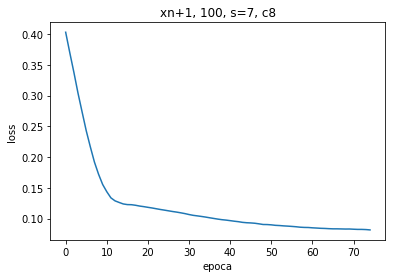

mae [0.34714682]


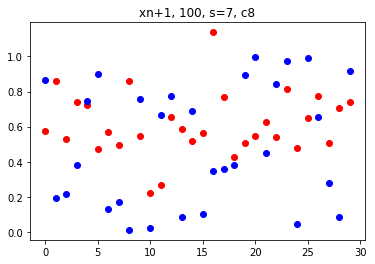

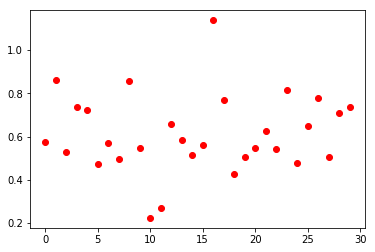

In [10]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Conv2D(1, (2, 2), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(70, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c8')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c8')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 86us/step
0.13167978823184967 0.0015207435935735703


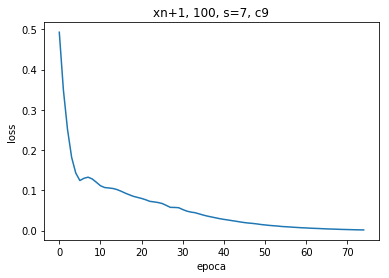

mae [0.29985168]


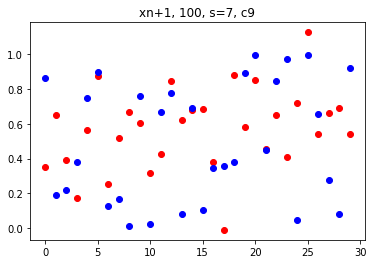

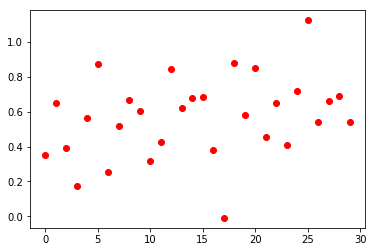

In [11]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(70, activation='relu'))
model.add(keras.layers.Dense(15, activation='linear'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c9')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c9')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 114us/step
0.16147930920124054 0.0003454150058262582


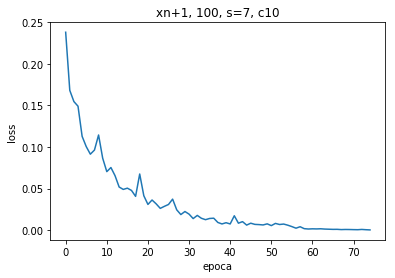

mae [0.33243245]


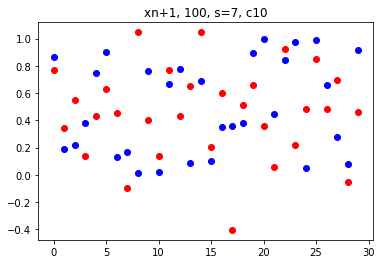

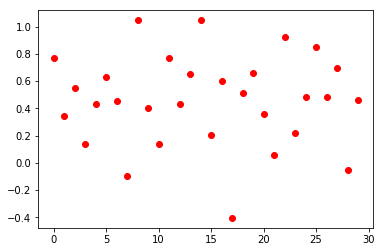

In [12]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(2, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c10')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c10')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 86us/step
0.20415443181991577 0.007150011616093772


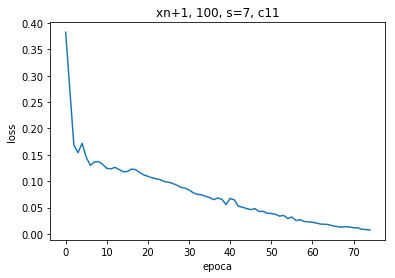

mae [0.36535291]


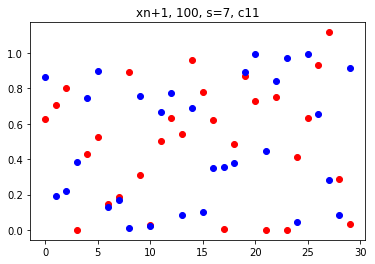

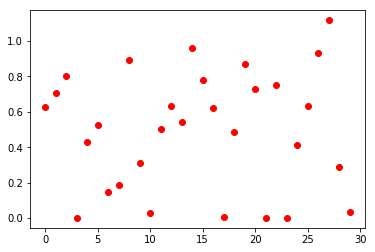

In [13]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Conv2D(6, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2000, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c11')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c11')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 86us/step
0.3633965849876404 0.40661741154534475


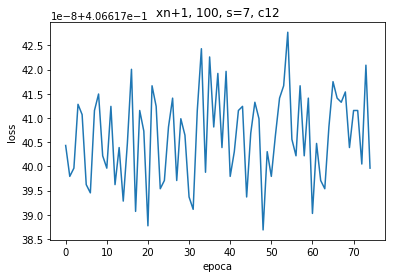

mae [0.49784079]


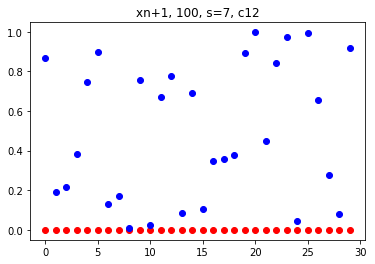

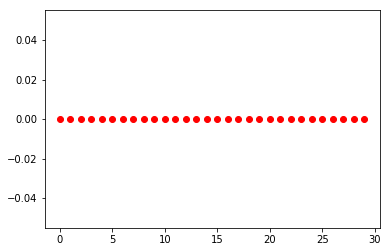

In [14]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Conv2D(6, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5000, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c12')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c12')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()

70/70 [==============================] - 0s 171us/step
0.1252349317073822 3.356401001285901e-05


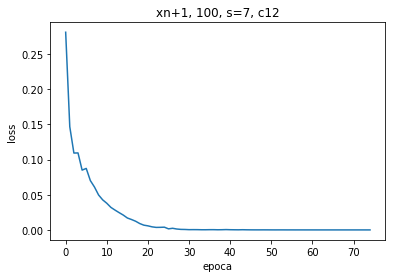

mae [0.30587103]


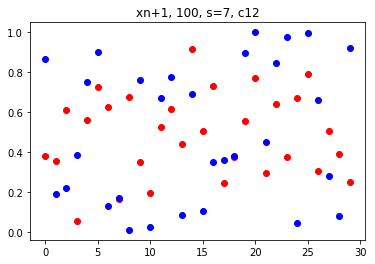

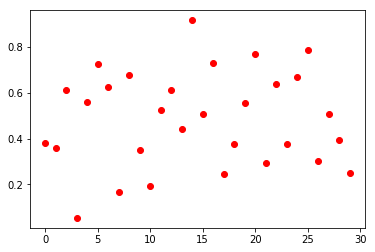

In [15]:

model = keras.Sequential()
model.add(keras.layers.Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(size,size,1)))
model.add(keras.layers.Conv2D(6, (2, 2), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(5000, activation='relu'))
model.add(keras.layers.Dense(1, activation='relu'))

model.compile(optimizer=keras.optimizers.Adam(),
              loss='mean_squared_error')


history = model.fit(dtrain, ltrain, epochs=75,verbose=0)

mse = model.evaluate(dtest, ltest)
    

msetrain = model.evaluate(dtrain, ltrain)
    
print(mse,msetrain)
plt.plot(history.history['loss'])
plt.title('xn+1, 100, s=7, c12')
plt.ylabel('loss')
plt.xlabel('epoca')
plt.show()
    
faprox = model.predict(dtest)

print('mae',sum(abs(faprox-ltest))/ltest.shape[0])
plt.title('xn+1, 100, s=7, c12')
plt.plot(faprox, 'ro')
plt.plot(ltest, 'bo')
plt.show()
    
plt.plot(faprox, 'ro')
plt.show()